In [1]:
library(tidyverse)
library(data.table)
library(cowplot)
library(aplot)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose



Attac

In [4]:
path_to_master_file <- '../data/sample_stats_22.08.2025_finalMS.tsv'

In [5]:
per_sample_stats_df <-
fread(path_to_master_file)

In [6]:
hist_x <- per_sample_stats_df %>%

ggplot()+
geom_histogram(aes(x = cov_chrA, fill = good_sample), binwidth = 0.02)+
scale_fill_manual(values = c('darkgrey', 'darkorange'))+
scale_x_log10()+
ylab('N')+
theme_bw() + 
theme(
    text = element_text(size = 16),
    legend.position="none", 
    axis.text.x=element_blank()
        axis.ticks.x=element_blank()
    axis.title.x=element_blank()
)

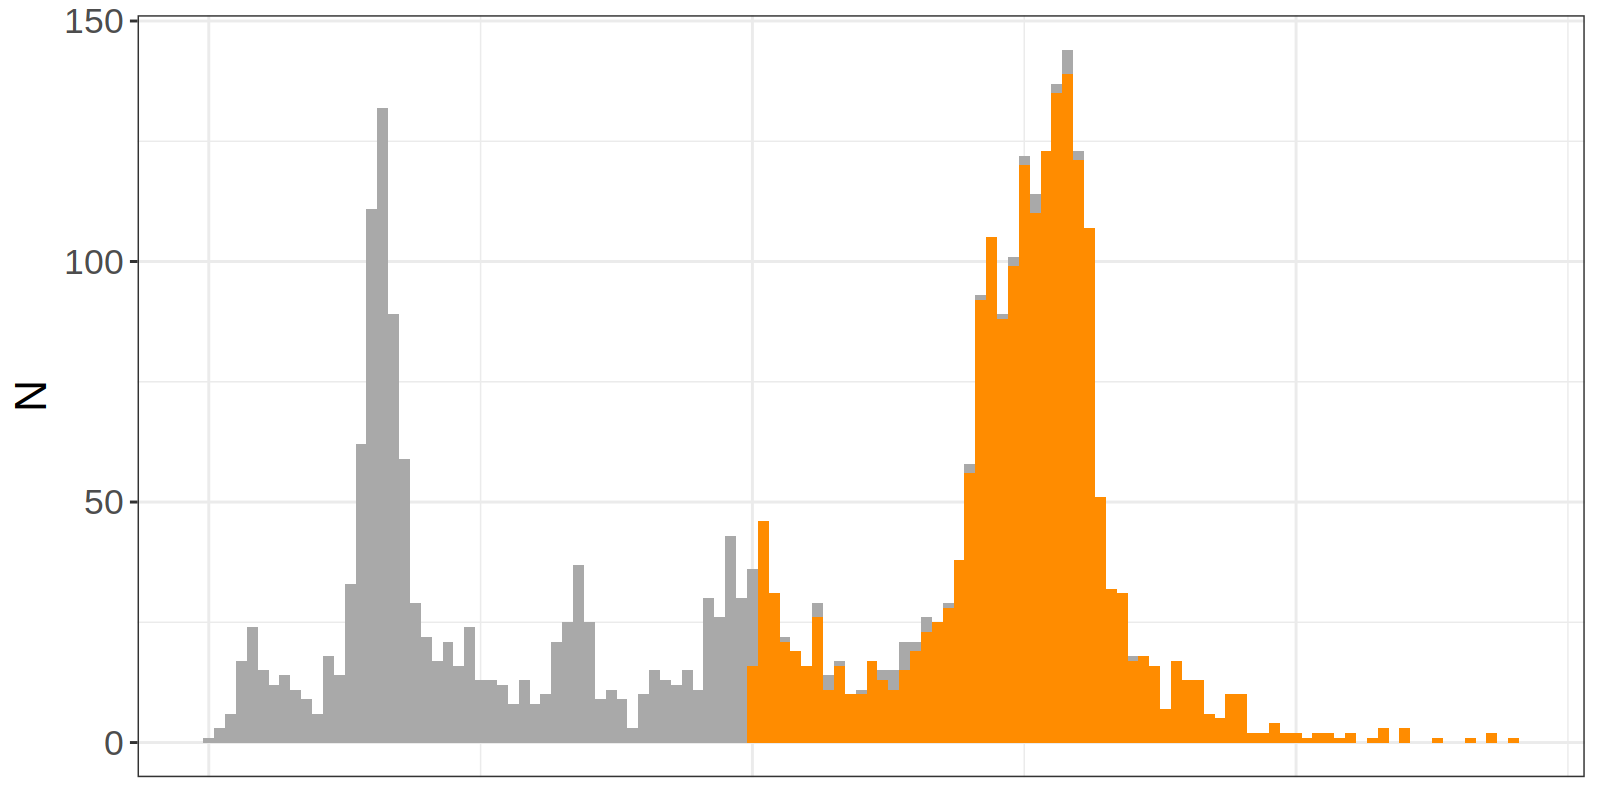

In [7]:
options(repr.plot.width = 8, repr.plot.height = 4, repr.plot.res = 200)
hist_x

In [8]:
hist_y <- per_sample_stats_df %>%

ggplot()+
geom_histogram(aes(x = frac_cov_chrA, fill = good_sample), binwidth = 0.02)+
scale_fill_manual(values = c('darkgrey', 'darkorange'))+
scale_x_continuous()+
ylab('N')+
coord_flip()+
theme_bw() + 
theme(
    text = element_text(size = 16),
    legend.position="none", 
    axis.text.y=element_blank()
    axis.ticks.y=element_blank()
    axis.title.y=element_blank()
)

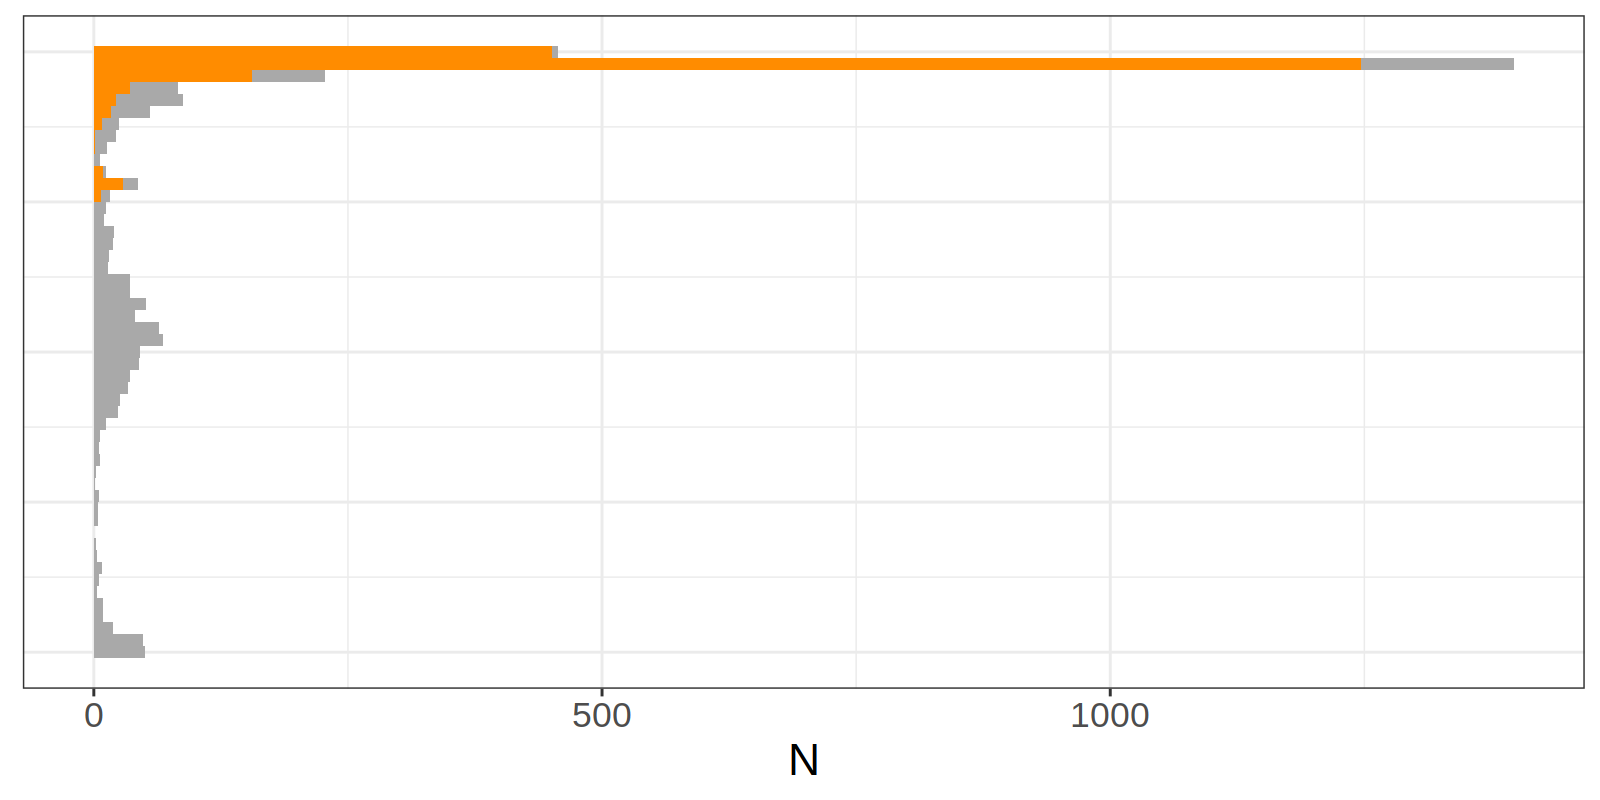

In [9]:
options(repr.plot.width = 8, repr.plot.height = 4, repr.plot.res = 200)
hist_y

In [10]:
scatter_plot <- per_sample_stats_df %>%

ggplot()+
geom_point(aes(x = cov_chrA, y = frac_cov_chrA, color = good_sample), alpha = 0.2, shape = 21, size = 3, stroke = 1)+
scale_x_log10(limits = c(0.9, 260))+
scale_y_continuous(limits = c(-0.05, 1.05))+
scale_color_manual(values = c('darkgrey', 'darkorange'))+
xlab('Depth')+
ylab('Genome length covered')+
theme_bw() + 
theme(
    text = element_text(size = 16),
    legend.position="none"
)


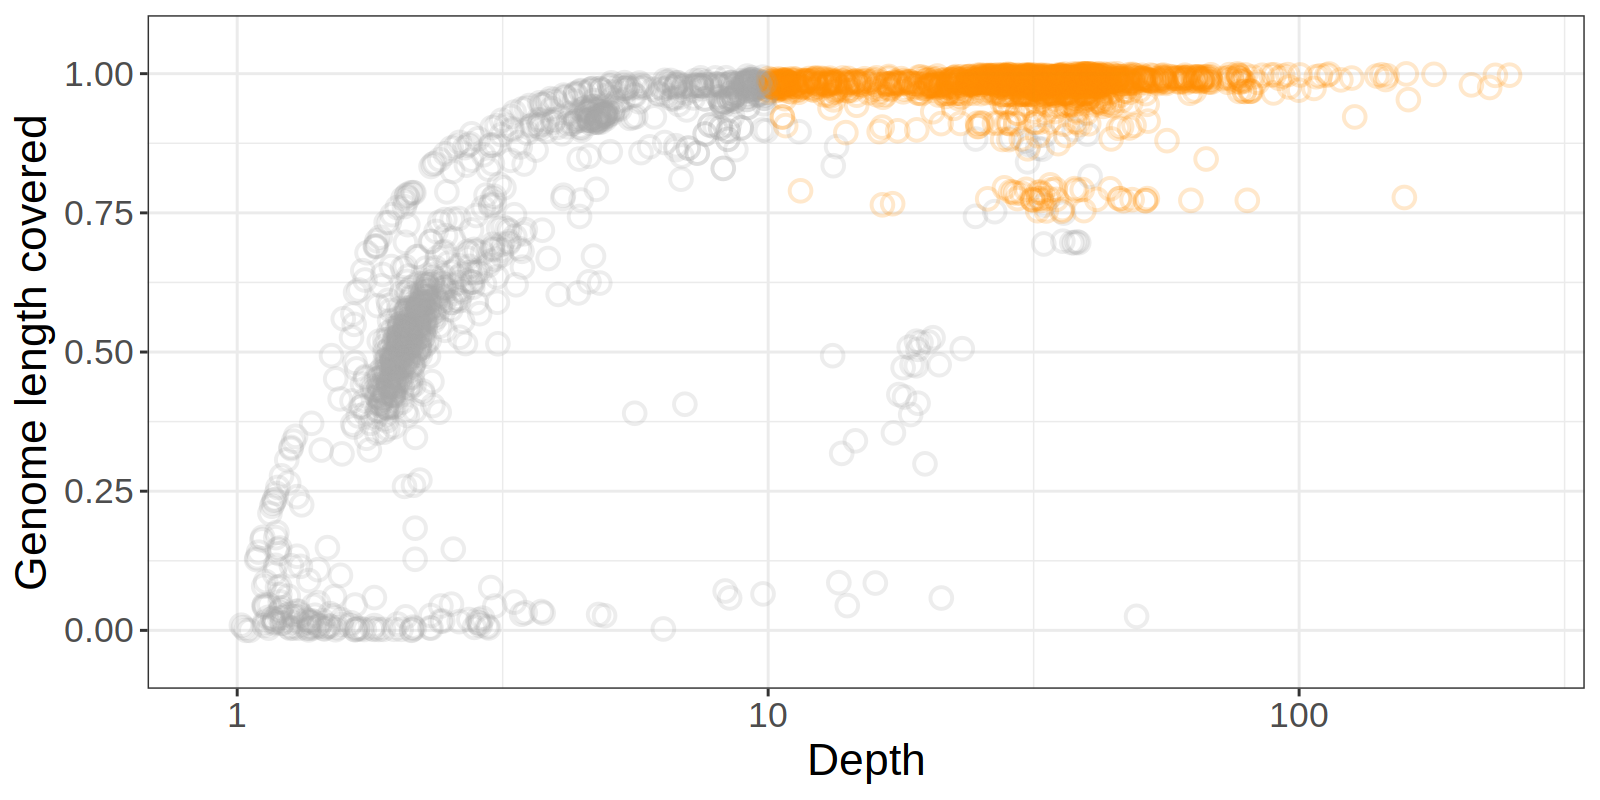

In [11]:
options(repr.plot.width = 8, repr.plot.height = 4, repr.plot.res = 200)
scatter_plot

Warning message:
“Removed 4 rows containing missing values or values outside the scale range (`geom_bar()`).”


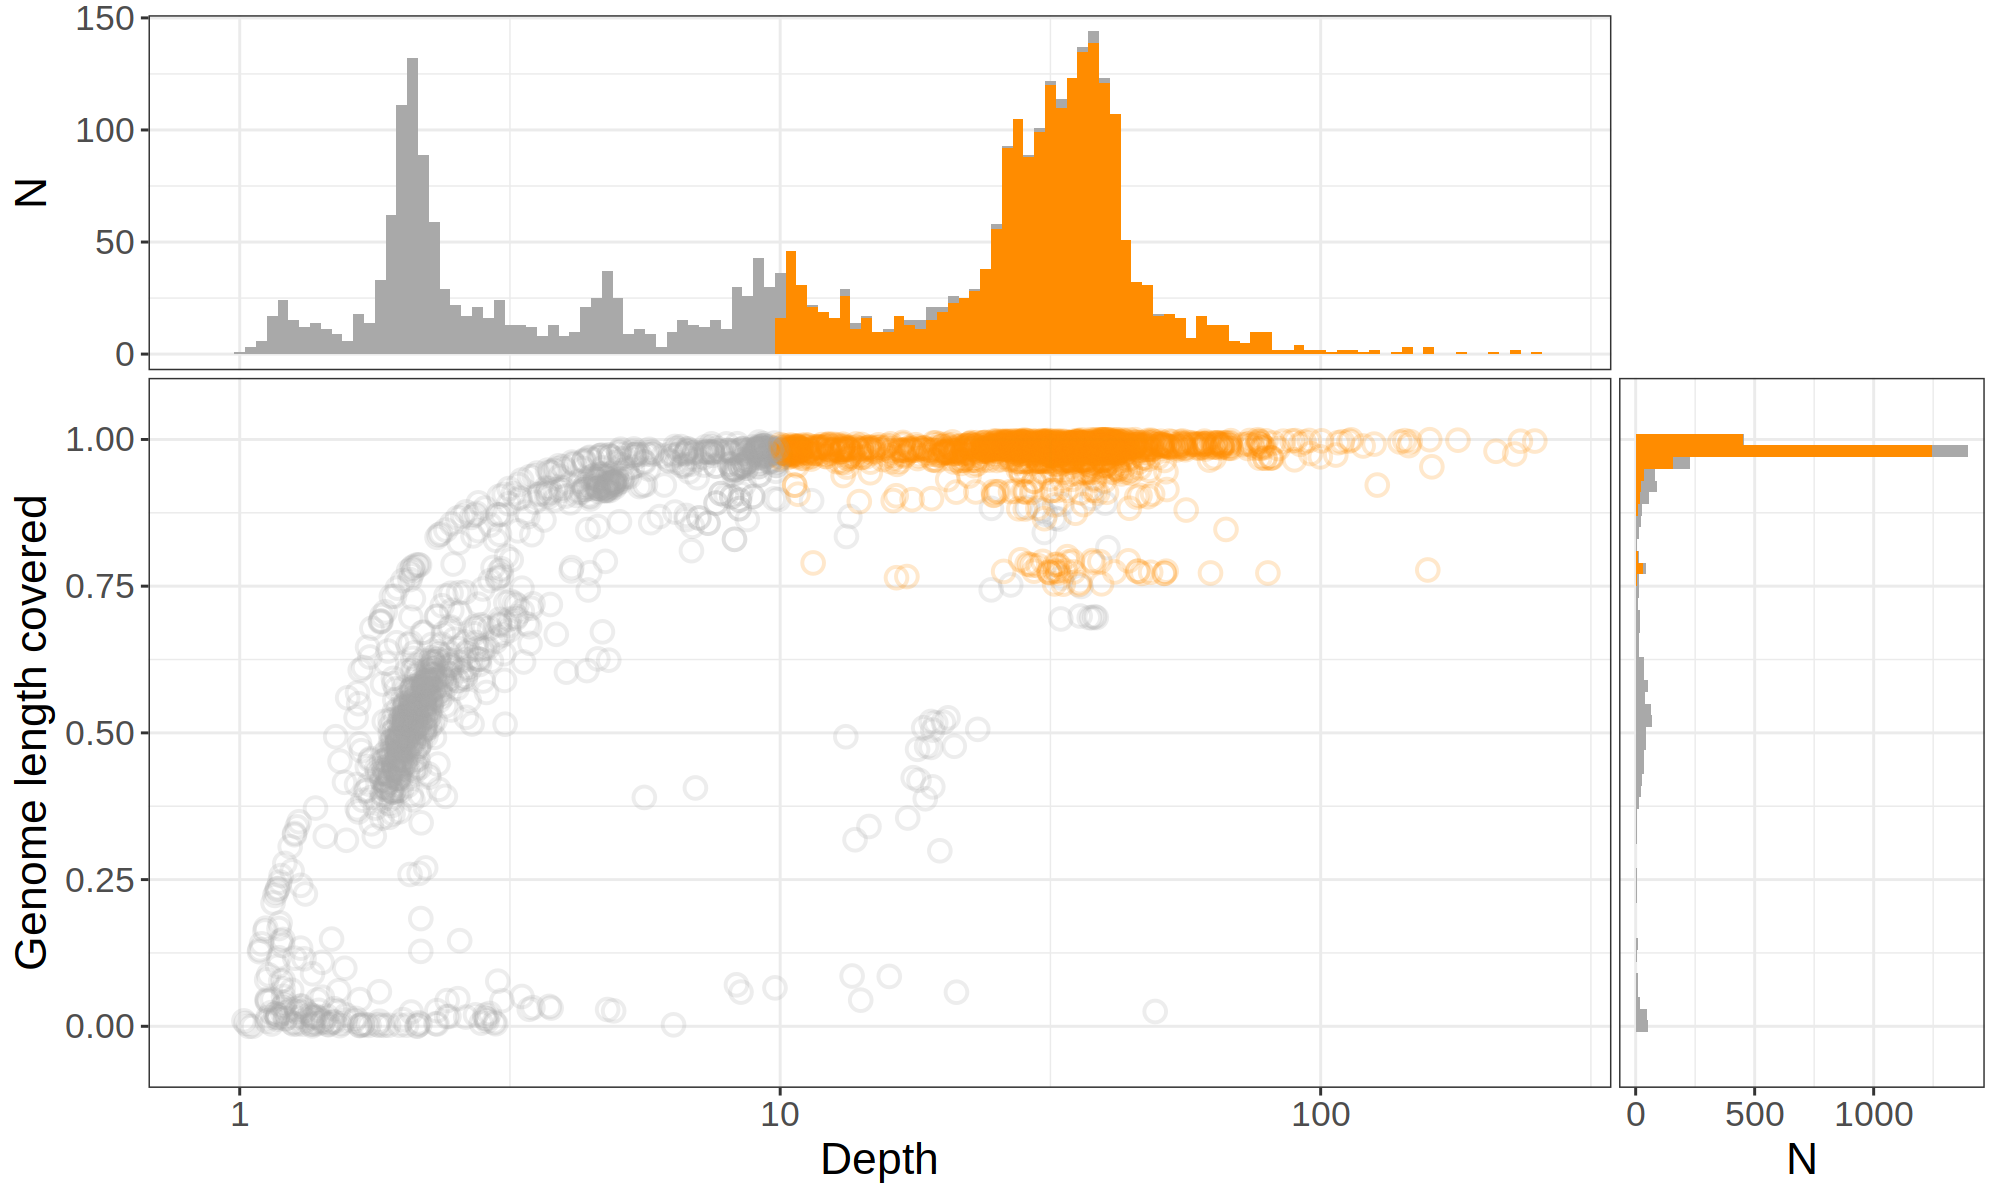

In [12]:
options(repr.plot.width = 10, repr.plot.height = 6, repr.plot.res = 200)
scatter_plot %>% insert_right(hist_y, width = 0.25) %>% insert_top(hist_x, height = 0.5)

In [13]:
pdf('coverage.pdf', width = 10, height = 6)
scatter_plot %>% insert_right(hist_y, width = 0.25) %>% insert_top(hist_x, height = 0.5)
dev.off()

Warning message:
“Removed 4 rows containing missing values or values outside the scale range (`geom_bar()`).”


pdf 
  2